# Explore Data

### Authors: Calvin Howard.

#### Last updated: July 6, 2023

Use this to assess if a predictors relationship to the predictee is different between two groups. 

Notes:
- To best use this notebook, you should be familar with mixed effects models

# 00 - Import CSV with All Data
**The CSV is expected to be in this format**
- ID and absolute paths to niftis are critical
```
+-----+----------------------------+--------------+--------------+--------------+
| ID  | Nifti_File_Path            | Covariate_1  | Covariate_2  | Covariate_3  |
+-----+----------------------------+--------------+--------------+--------------+
| 1   | /path/to/file1.nii.gz      | 0.5          | 1.2          | 3.4          |
| 2   | /path/to/file2.nii.gz      | 0.7          | 1.4          | 3.1          |
| 3   | /path/to/file3.nii.gz      | 0.6          | 1.5          | 3.5          |
| 4   | /path/to/file4.nii.gz      | 0.9          | 1.1          | 3.2          |
| ... | ...                        | ...          | ...          | ...          |
+-----+----------------------------+--------------+--------------+--------------+
```

In [18]:
# Specify the path to your CSV file containing NIFTI paths
input_csv_path = '/Users/cu135/Dropbox (Partners HealthCare)/studies/cognition_2023/metadata/programming_accetpability.xlsx'

In [19]:
# Specify where you want to save your results to
out_dir = '/Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/subiculum_cognition_and_age/figures/Figures/prospective_pie_chart'

In [20]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet='Sheet1')
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()


,SubId,City,Right_Electrode_Distance,Realistic_Distance_Estimate,Age,Distance,Count,Percent,Cumulative_Percent
0,1,Wuzrburg,5,2,NaN,5.0,1.0,0.007353,NaN
1,2,Wuzrburg,4,2,NaN,4.0,0.0,0.000000,NaN
2,3,Wuzrburg,4,1,NaN,3.0,19.0,0.139706,0.147059
3,4,Wuzrburg,5,2,NaN,2.0,44.0,0.323529,0.323529
4,5,Wuzrburg,3,2,NaN,1.0,40.0,0.294118,0.294118
...,...,...,...,...,...,...,...,...,...
131,146,Toronto,0,0,76.0,NaN,NaN,NaN,NaN
132,147,Toronto,2,2,59.0,NaN,NaN,NaN,NaN
133,148,Toronto,2,2,51.0,NaN,NaN,NaN,NaN
134,149,Toronto,2,2,77.0,NaN,NaN,NaN,NaN


# 01 - Preprocess Your Data

**Handle NANs**
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [21]:
data_df.columns

Index(['SubId', 'City', 'Right_Electrode_Distance',
       'Realistic_Distance_Estimate', 'Age', 'Distance', 'Count', 'Percent',
       'Cumulative_Percent'],
      dtype='object')

In [22]:
drop_list = ['Cumulative_Percent']

In [23]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
display(data_df)

,SubId,City,Right_Electrode_Distance,Realistic_Distance_Estimate,Age,Distance,Count,Percent,Cumulative_Percent
2,3,Wuzrburg,4,1,NaN,3.0,19.0,0.139706,0.147059
3,4,Wuzrburg,5,2,NaN,2.0,44.0,0.323529,0.323529
4,5,Wuzrburg,3,2,NaN,1.0,40.0,0.294118,0.294118
5,6,Wuzrburg,5,2,NaN,0.0,32.0,0.235294,0.235294


**Drop Row Based on Value of Column**

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

In [22]:
data_df.columns

Index(['subject', 'CerebellumSBM', 'CerebellumCSF', 'CerebellumGM',
       'cerebellumVisualCH', 'CerebellumWM', 'FrontalSurface', 'FrontalCSF',
       'FrontalGM', 'frontalVisualCH', 'FrontalWM', 'InsularSurface',
       'InsularCSF', 'InsularGM', 'InsularWM', 'InsularVisualCH', 'MTLSurface',
       'MTLVisualCH', 'MTLCSF', 'MTLGM', 'MTLWM', 'OccipitalSurface',
       'OccipitalCSF', 'OccipitalGM', 'occipitalVisualCH', 'OccipitalWM',
       'ParietalSurface', 'ParietalCSF', 'ParietalGM', 'parietalVisualCH',
       'ParietalWM', 'TemporalSurface', 'TemporalCSF', 'TemporalGM',
       'temporalVisualCH', 'TemporalWM', 'ventricleVisualCH',
       'SubcortexSurface', 'SubcortexSurfaceVentricle', 'SubcortexCSF',
       'SubcortexGM', 'SubcortexWM', 'WholeBrainSurface', 'WholeBrainCSF',
       'WholeBrainGM', 'WholeBrainWM'],
      dtype='object')

Set the parameters for dropping rows

In [19]:
column = 'City'  # The column you'd like to evaluate
condition = 'not'  # The condition to check ('equal', 'above', 'below')
value = "Wurzburg"  # The value to compare against

In [20]:
data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
display(data_df)

,subject,Age,Normalized_Percent_Cognitive_Improvement,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_Connectivity,Subiculum_Connectivity,Amnesia_Lesion_T_Map,Memory_Network_T,Z_Scored_Memory_Network_R,...,Subiculum_Group_By_Inflection,Cognitive_Baseline,Z_Scored_Cognitive_Baseline,Z_Scored_Cognitive_Baseline__Lower_is_Better_,Min_Max_Normalized_Baseline,MinMaxNormBaseline_Higher_is_Better,ROI_to_Alz_Max,ROI_to_PD_Max,Standardzied_AD_Max,Standardized_PD_Max
46,1,57.0,-2.609929,-1.372562,-5.673759,1.080695,30.376565,-0.113151,0.273890,1.300775,...,High,141.0,-0.115295,-0.115295,0.625,0.625,22.020300,20.467840,1.056258,0.508516
47,2,50.0,0.992806,1.331414,2.158273,-0.930548,16.295870,-0.502484,-0.154892,-0.834092,...,Low,139.0,-0.935174,-0.935174,0.375,0.375,11.487188,4.942970,-0.759238,-1.629565
48,3,62.0,-0.638889,0.106772,-1.388889,1.155469,30.900051,-0.398033,0.030553,0.548198,...,High,144.0,1.114522,1.114522,1.000,1.000,23.013479,22.145924,1.227443,0.739621
49,4,50.0,-0.985714,-0.153533,-2.142857,-0.228971,21.207602,-0.426115,-0.043983,-0.295586,...,Low,140.0,-0.525235,-0.525235,0.500,0.500,12.198485,18.933435,-0.636638,0.297198
50,6,60.0,-0.323944,0.343149,-0.704225,0.109572,23.577739,-0.454075,-0.053915,-0.084635,...,High,142.0,0.294644,0.294644,0.750,0.750,17.634088,18.128314,0.300247,0.186317
51,7,73.0,-0.326241,0.341424,-0.709220,1.977842,36.657479,-0.177886,0.269167,1.688136,...,High,141.0,-0.115295,-0.115295,0.625,0.625,24.162033,27.503198,1.425409,1.477423
52,9,64.0,-0.985714,-0.153533,-2.142857,-0.407778,19.955774,-0.494405,-0.132818,-0.631960,...,Low,140.0,-0.525235,-0.525235,0.500,0.500,10.782803,14.964053,-0.880646,-0.249464
53,11,62.0,-0.319444,0.346526,-0.694444,-1.093332,15.156220,-0.507962,-0.165672,-1.049905,...,Low,144.0,1.114522,1.114522,1.000,1.000,9.653427,12.002916,-1.075306,-0.657271
54,12,54.0,0.000000,0.586280,0.000000,0.788134,28.328345,-0.220427,0.210477,1.138770,...,High,136.0,-2.164991,-2.164991,0.000,0.000,21.521001,21.243697,0.970198,0.615367
55,14,49.0,0.321678,0.827710,0.699301,-0.455880,19.619016,-0.440579,-0.072634,-0.467260,...,Low,143.0,0.704583,0.704583,0.875,0.875,10.881447,15.224677,-0.863644,-0.213571


**Standardize Data**
- Enter Columns you Don't want to standardize into a list

In [78]:
# Remove anything you don't want to standardize
cols_not_to_standardize = ['Age']

In [79]:
data_df = cal_palm.standardize_columns(cols_not_to_standardize)
data_df

Unable to standardize column Disease: Could not convert ParkinsonParkinsonParkinsonParkinsonParkinsonParkinsonParkinsonParkinsonParkinsonParkinsonParkinsonParkinsonParkinsonParkinsonParkinsonParkinson to numeric
Unable to standardize column City: Could not convert BostonBostonBostonBostonBostonBostonBostonBostonBostonBostonBostonBostonBostonBostonBostonBoston to numeric
Unable to standardize column Age_Group: Could not convert youngyoungyoungoldyoungoldyoungyoungyoungyoungyoungyoungyoungyoungyoungyoung to numeric
Unable to standardize column Age_And_Disease: Could not convert Parkinson_youngParkinson_youngParkinson_youngParkinson_oldParkinson_youngParkinson_oldParkinson_youngParkinson_youngParkinson_youngParkinson_youngParkinson_youngParkinson_youngParkinson_youngParkinson_youngParkinson_youngParkinson_young to numeric
Unable to standardize column Subiculum_Group: Could not convert highhighlowlowlowlowhighhighlowlowhighlowhighhighlowhigh to numeric
Unable to standardize column Age_Dise

,subject,Age,Normalized_Percent_Cognitive_Improvement,Z_Scored_Percent_Cognitive_Improvement,Percent_Cognitive_Improvement,Z_Scored_Subiculum_Connectivity,Subiculum_Connectivity,Amnesia_Lesion_T_Map,Memory_Network_T,Z_Scored_Memory_Network_R,...,Subiculum_Group_By_Inflection,Cognitive_Baseline,Z_Scored_Cognitive_Baseline,Z_Scored_Cognitive_Baseline__Lower_is_Better_,Min_Max_Normalized_Baseline,MinMaxNormBaseline_Higher_is_Better,ROI_to_Alz_Max,ROI_to_PD_Max,Standardzied_AD_Max,Standardized_PD_Max
80,-1.652802,65.0,-0.855337,0.855337,0.447214,0.111202,-1.920852,NaN,NaN,NaN,...,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,-1.353144,69.0,0.197386,-0.197386,0.447214,0.132081,0.763335,NaN,NaN,NaN,...,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,-1.278229,67.0,0.197386,-0.197386,0.447214,-0.116636,-0.494291,NaN,NaN,NaN,...,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,-1.053486,62.0,0.197386,-0.197386,0.447214,-2.066439,1.157517,NaN,NaN,NaN,...,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,-0.903657,68.0,-0.855337,0.855337,0.447214,-1.210762,0.143907,NaN,NaN,NaN,...,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,-0.678913,48.0,1.250108,-1.250108,-2.236068,-0.387030,0.350383,NaN,NaN,NaN,...,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,-0.004682,62.0,0.197386,-0.197386,NaN,0.899908,NaN,NaN,NaN,NaN,...,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,0.145147,56.0,-1.908060,1.908060,NaN,0.421870,NaN,NaN,NaN,NaN,...,High,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
90,0.220061,60.0,0.197386,-0.197386,NaN,-0.490852,NaN,NaN,NaN,NaN,...,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,0.444805,63.0,0.197386,-0.197386,NaN,-0.137172,NaN,NaN,NaN,NaN,...,Low,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 1.5 - Descriptive Stats

In [23]:
data_df.describe()

,CerebellumSBM,CerebellumCSF,CerebellumGM,cerebellumVisualCH,CerebellumWM,FrontalSurface,FrontalCSF,FrontalGM,frontalVisualCH,FrontalWM,...,ventricleVisualCH,SubcortexSurface,SubcortexSurfaceVentricle,SubcortexCSF,SubcortexGM,SubcortexWM,WholeBrainSurface,WholeBrainCSF,WholeBrainGM,WholeBrainWM
count,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,...,50.000000,50.000000,50.0,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,0.0,1655.380325,107.655349,0.840000,1319.384195,-101.687390,4092.633869,204.160705,0.960000,6638.569071,...,1.020000,-72.832824,0.0,3866.310139,2064.861824,9399.078340,-286.056129,17397.190874,-1493.252885,23383.426351
std,0.0,5450.653538,10766.002755,0.650275,7286.948773,83.629327,11012.419753,16114.802722,0.698687,10962.588735,...,0.868731,55.325194,0.0,9437.736232,7646.536695,41518.325357,210.836863,39388.865098,55196.413423,66633.241191
min,0.0,-8765.419115,-26412.015930,0.000000,-14307.885460,-335.655284,-16935.218110,-40740.635520,0.000000,-16728.096790,...,0.000000,-211.028300,0.0,-4797.764963,-15512.725440,-72230.144580,-740.706545,-50519.732690,-143202.894800,-109992.038300
25%,0.0,-2311.770645,-4505.828557,0.000000,-3224.098053,-119.289151,-4607.428430,-10001.926703,0.250000,-32.853210,...,0.000000,-123.482326,0.0,-1120.418129,-1786.015749,-27185.931928,-383.927404,-11205.534057,-32150.369580,-23858.689988
50%,0.0,881.012102,-1286.185966,1.000000,1049.373776,-80.562716,3737.062386,1246.144081,1.000000,5230.567472,...,1.000000,-55.701697,0.0,201.688561,1651.106867,12531.413275,-234.914356,12361.866855,848.580664,29370.577105
75%,0.0,5010.196432,5020.997462,1.000000,4792.182967,-35.798727,11682.016182,8393.297360,1.000000,14892.589045,...,2.000000,-27.728269,0.0,6312.230860,5095.023978,37439.187950,-108.553234,46595.119550,29087.186380,66299.998122
max,0.0,21528.922020,25114.113290,2.000000,21345.037160,-18.170561,32409.225480,36997.985770,2.000000,27764.291620,...,3.000000,-7.110089,0.0,53880.811260,23793.286440,89324.463280,-42.407528,121852.711500,112180.981200,155590.197100


# 02 - Visualize 3D Data

In [24]:
import plotly.express as px

def generate_scatterplot(dataframe, data_dict, correlation, palette, out_dir):
    """
    Generates a 3D scatter plot from the given DataFrame and saves it to the specified directory.

    Parameters:
    - dataframe: pandas DataFrame containing the data.
    - data_dict: Dictionary with one key-value pair, where the key is the dependent variable 
                 and the value is a list of independent variables (length should be 2 for 3D scatter).
    - x_label, y_label, z_label: Labels for the x, y, and z axes.
    - correlation: Whether to display correlation information on the plot (True/False).
    - palette: Color palette for the plot.
    - out_dir: Directory path where the plot image will be saved.
    """
    dependent_var = list(data_dict.keys())[0]
    independent_vars = data_dict[dependent_var]

    if len(independent_vars) != 2:
        raise ValueError("Independent variable list must contain exactly two elements for 3D scatter plot.")

    fig = px.scatter_3d(dataframe, x=independent_vars[0], y=independent_vars[1], z=dependent_var,
                        color=dependent_var, color_continuous_scale=palette)

    # Set the labels
    fig.update_layout(scene=dict(
        xaxis_title=independent_vars[0],
        yaxis_title=independent_vars[1],
        zaxis_title=dependent_var
    ))

    # Optionally, add correlation info as annotation
    if correlation:
        # Compute and display correlation (requires additional implementation)
        pass

    # Save the plot to the output directory
    fig.write_image(f"{out_dir}/3d_scatter_plot.png")

    return fig

In [25]:
data_df.columns

Index(['subject', 'CerebellumSBM', 'CerebellumCSF', 'CerebellumGM',
       'cerebellumVisualCH', 'CerebellumWM', 'FrontalSurface', 'FrontalCSF',
       'FrontalGM', 'frontalVisualCH', 'FrontalWM', 'InsularSurface',
       'InsularCSF', 'InsularGM', 'InsularWM', 'InsularVisualCH', 'MTLSurface',
       'MTLVisualCH', 'MTLCSF', 'MTLGM', 'MTLWM', 'OccipitalSurface',
       'OccipitalCSF', 'OccipitalGM', 'occipitalVisualCH', 'OccipitalWM',
       'ParietalSurface', 'ParietalCSF', 'ParietalGM', 'parietalVisualCH',
       'ParietalWM', 'TemporalSurface', 'TemporalCSF', 'TemporalGM',
       'temporalVisualCH', 'TemporalWM', 'ventricleVisualCH',
       'SubcortexSurface', 'SubcortexSurfaceVentricle', 'SubcortexCSF',
       'SubcortexGM', 'SubcortexWM', 'WholeBrainSurface', 'WholeBrainCSF',
       'WholeBrainGM', 'WholeBrainWM'],
      dtype='object')

In [30]:
data_dict = {'ventricleVisualCH': ['SubcortexSurface', 'SubcortexCSF']}

In [31]:
# Example usage
plot = generate_scatterplot(dataframe=data_df, 
                            data_dict=data_dict,
                            correlation=True,
                            palette='Reds',
                            out_dir=out_dir)
plot

# 03 - Visualize Distribution

In [14]:
data_df.columns

Index(['subject', 'Age', 'Normalized_Percent_Cognitive_Improvement',
       'Z_Scored_Percent_Cognitive_Improvement',
       'Percent_Cognitive_Improvement', 'Z_Scored_Subiculum_Connectivity',
       'Subiculum_Connectivity', 'Amnesia_Lesion_T_Map', 'Memory_Network_T',
       'Z_Scored_Memory_Network_R', 'Memory_Network_R',
       'Subiculum_Grey_Matter', 'Subiculum_White_Matter', 'Subiculum_CSF',
       'Subiculum_Total', 'Standardized_Age',
       'Standardized_Percent_Improvement',
       'Standardized_Subiculum_Connectivity',
       'Standardized_Subiculum_Grey_Matter',
       'Standardized_Subiculum_White_Matter', 'Standardized_Subiculum_CSF',
       'Standardized_Subiculum_Total', 'Disease', 'Cohort', 'City',
       'Inclusion_Cohort', 'Age_Group', 'Age_And_Disease', 'Subiculum_Group',
       'Age_Disease_and_Cohort', 'Subiculum_Group_By_Inflection',
       'Cognitive_Baseline', 'Z_Scored_Cognitive_Baseline'],
      dtype='object')

In [62]:
scatter_variable = 'Z_Scored_Cognitive_Baseline'
categorical_variable = 'Disease'

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import numpy as np
import os

def create_custom_stripplot(data, x_variable, y_variable, hue_change_value, out_dir=None):
    sns.set(style="white")

    # Get/set params for the color mapping
    vcenter = hue_change_value
    vmin, vmax = data[y_variable].min(), data[y_variable].max()
    normalize = mcolors.TwoSlopeNorm(vcenter=vcenter, vmin=vmin, vmax=vmax)
    colormap = cm.coolwarm

    # Create a scatter plot with custom color mapping
    plt.figure(figsize=(6, 6))
    ax = sns.scatterplot(
        x=x_variable,
        y=y_variable,
        data=data,
        c=data[y_variable],
        norm=normalize,
        cmap=colormap,
    )
    ax.axhline(y=vcenter, color='gray', linestyle='--')

    # Tweak the points to mimic `sns.stripplot`
    pts = ax.collections[0]
    pts.set_offsets(pts.get_offsets() + np.c_[np.random.uniform(-0.1, 0.1, len(data)), np.zeros(len(data))])
    ax.margins(x=0.15)

    scalarmappable = cm.ScalarMappable(norm=normalize, cmap=colormap)
    scalarmappable.set_array(data[y_variable])

    # Add a colorbar
    cbar = plt.colorbar(scalarmappable, ax=ax)
    cbar.set_label(y_variable)

    plt.title(f'Strip Plot of {y_variable} by {x_variable} with Hue Change at {hue_change_value}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    sns.despine()
    
    # Save the figure if out_dir is provided
    if out_dir:
        os.makedirs(out_dir, exist_ok=True)
        plt.savefig(f"{out_dir}/strip_plot.png", bbox_inches='tight')
        plt.savefig(f"{out_dir}/strip_plot.svg", bbox_inches='tight')
        print(f'Saved to {out_dir}/strip_plot.svg')
    else:
        plt.show()

In [58]:
# Example usage:
create_custom_stripplot(data_df, categorical_variable, scatter_variable, 0, out_dir=out_dir)

ValueError: vmin, vcenter, and vmax must be in ascending order

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import os

def create_distribution_violin_plot(data, x_variable, y_variable, hue_change_value, out_dir=None):
    sns.set(style="white")
    plt.figure(figsize=(5, 6))

    # Create the violin plot with specified parameters
    sns.violinplot(data=data, x=x_variable, y=y_variable, hue=x_variable, width=.9, cut=2, split=False, inner='box', palette='Greys', alpha=0.1)

    # Create the swarm plot on top of the violin plot
    sns.swarmplot(data=data, x=x_variable, y=y_variable, hue=x_variable, palette=['red', 'blue'], alpha=0.7)

    plt.title(f'Strip Plot with Hemi Violin of {y_variable} by {x_variable} with Hue Change at {hue_change_value}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    # Save the figure if out_dir is provided
    if out_dir:
        os.makedirs(out_dir, exist_ok=True)
        plt.savefig(f"{out_dir}/distribution_violin.png", bbox_inches='tight')
        plt.savefig(f"{out_dir}/distribution_violin.svg", bbox_inches='tight')
        print(f'Saved to {out_dir}/distribution_violin.svg')
    else:
        plt.show()



Saved to /Users/cu135/Library/CloudStorage/OneDrive-Personal/OneDrive_Documents/Research/2023/subiculum_cognition_and_age/figures/Figures/figure_four/raws/distribution_violin.svg


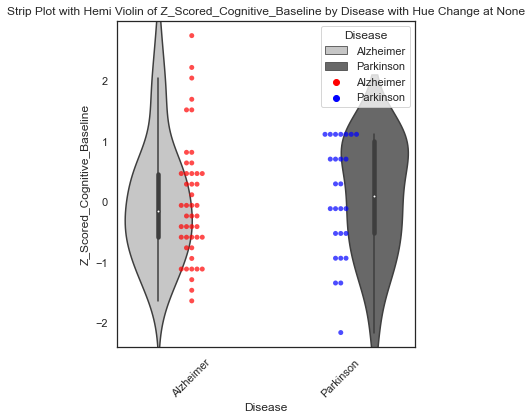

In [65]:
# Example usage:
create_distribution_violin_plot(data_df, categorical_variable, scatter_variable, None, out_dir=out_dir)

# Create Pie Chart

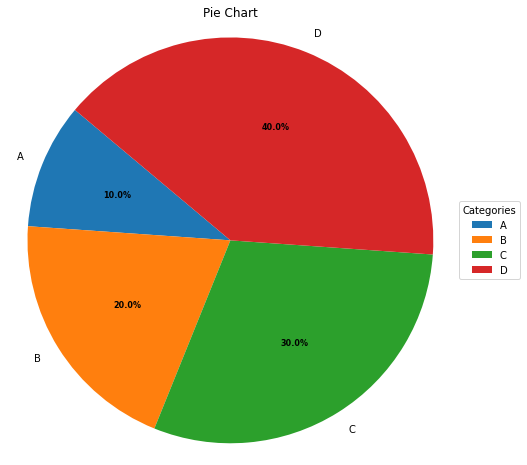

In [26]:
import os
import pandas as pd
import matplotlib.pyplot as plt

def create_pie_chart(series, out_dir=None):
    """
    Takes a pandas Series and generates a pie chart using the Tab10 colormap.
    
    Parameters:
    series (pandas.Series): The input series where the index will be used as labels and the values as sizes.
    out_dir (str, optional): Directory to save the pie chart images. Saves in both PNG and SVG formats if provided.
    """
    # Check if the input is a pandas Series
    if not isinstance(series, pd.Series):
        raise ValueError("The input must be a pandas Series.")
    
    # Set the Tab10 colormap
    cmap = plt.get_cmap("tab10")
    colors = cmap(range(len(series)))
    
    # Generate the pie chart
    fig, ax = plt.subplots(figsize=(8, 8))  # Set the figure size for better visibility
    wedges, texts, autotexts = ax.pie(series, labels=series.index, autopct='%1.1f%%', startangle=140, colors=colors)
    
    # Add legend, which can be edited later by accessing the `legend` object
    ax.legend(wedges, series.index, title="Categories", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
    
    plt.setp(autotexts, size=8, weight="bold")
    ax.set_title("Pie Chart")
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    
    # Save figures if out_dir is provided
    if out_dir is not None:
        if not os.path.exists(out_dir):
            os.makedirs(out_dir)
        plt.savefig(os.path.join(out_dir, 'pie.png'))
        plt.savefig(os.path.join(out_dir, 'pie.svg'))

    plt.show()

# Example usage with a sample pandas Series
sample_series = pd.Series([10, 20, 30, 40], index=['A', 'B', 'C', 'D'])

# You can specify an output directory where the pie chart images will be saved, or use None to only display the chart
create_pie_chart(sample_series, out_dir=None)


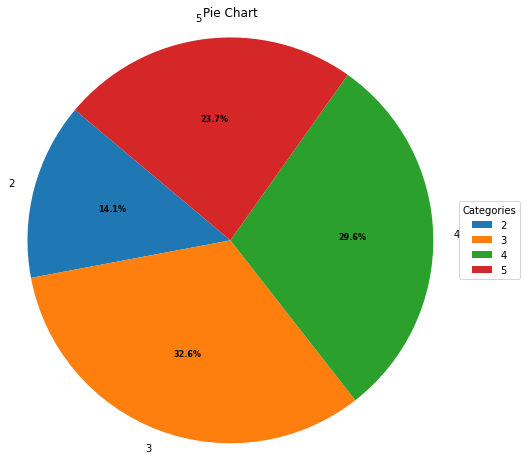

In [27]:
create_pie_chart(data_df['Percent'], out_dir=out_dir)